<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

# 학습 목표

- 데이터프레임을 대상으로 groupby 메소드를 사용해 집계할 수 있습니다.


# 5.데이터프레임 집계

- 상세 데이터가 아닌 집계된 데이터에 대한 분석을 자주 요구하니 익숙해져야 할 내용입니다.
- sum(), mean(), max(), min(), count() 메소드를 사용해 지정한 열 또는 열들을 기준으로 집계합니다.
- 평균을 구하는 메소드가 avg()가 아닌 mean() 임을 주의하기 바랍니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 파일 불러오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Graduate_apply.csv'
graduate = pd.read_csv(path, sep=',')  

# 확인
graduate.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## 5.1. 합 구하기

### 5.1.1. 열 하나 집계

- 우선 특정 열의 값 합은 다음과 같이 구할 수 있습니다.

In [3]:
# gre 합
graduate['gre'].sum()

235080

In [4]:
# gre, gpa 각각의 합
graduate[['gre', 'gpa']].sum()

gre    235080.00
gpa      1355.96
dtype: float64

In [5]:
# 범주형 변수(=열)
graduate['rank'].value_counts()

2    151
3    121
4     67
1     61
Name: rank, dtype: int64

**1) 집계하기**

- 만일 rank 별로 합을 구하고자 한다면 다음과 같이 합니다.
- 아래 결과 값 네 개를 더하면 전체 합이 됩니다.
- **as_index=True**를 설정(기본값)하면 집계 기준이 되는 열이 인덱스 열이 됩니다.
- 집계 결과가 gre 열만 가지니 시리즈가 됩니다.

In [6]:
# rank별 gre 합 --> 시리즈
graduate.groupby('rank', as_index=True)['gre'].sum()

rank
1    37320
2    90000
3    69560
4    38200
Name: gre, dtype: int64

- **[['gre']].sum()**과 같이 하면 열이 여럿이라는 의미여서 결과가 **데이터프레임**이 됩니다.

In [7]:
# rank별 gre 합 --> 데이터프레임
graduate.groupby('rank', as_index=True)[['gre']].sum()

,gre
rank,
1,37320
2,90000
3,69560
4,38200


- **as_index=False**를 설정하면 행 번호를 기반으로 한 정수 값이 인덱스로 설정됩니다.
- 집계 결과가 rank, gre 두 개의 열을 가지니 데이터프레임이 됩니다.

In [8]:
# rank별 gre 합 --> 데이터프레임
graduate.groupby('rank', as_index=False)['gre'].sum()

,rank,gre
0,1,37320
1,2,90000
2,3,69560
3,4,38200


- 위 결과가 이미 데이터프레임이니 **[['gre']].sum()**과 같이 해도 같은 모습의 결과를 얻습니다.

In [9]:
# rank별 gre 합 --> 데이터프레임
graduate.groupby('rank', as_index=False)[['gre']].sum()

,rank,gre
0,1,37320
1,2,90000
2,3,69560
3,4,38200


**2) 데이터프레임으로 선언**

- 집계 결과를 새로운 데이터프레임으로 선언하여 사용하는 경우가 많습니다.
- 집계된 결과를 반복해서 사용하거나, 분석 대상이 되는 경우 데이터프레임으로 선언함이 유익합니다.

In [10]:
# rank별 gre 합 조회
gr_sum = graduate.groupby('rank', as_index=False)['gre'].sum()

# 확인
gr_sum

,rank,gre
0,1,37320
1,2,90000
2,3,69560
3,4,38200


**3) 집계 결과 시각화**

- 위 과정으로 집계한 결과를 막대그래프로 간단히 시각화 해봅니다.

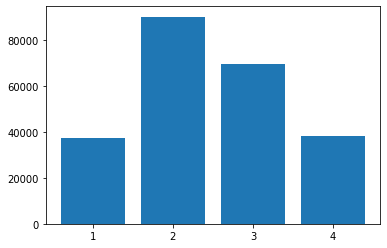

In [13]:
# bar chart 표시
# plt.bar(x=gr_sum['rank'], height=gr_sum['gre'])
plt.bar(gr_sum['rank'], gr_sum['gre'])
plt.xticks([1,2,3,4]) # 참고
plt.show()

- plt.bar() 대신 plt.barh() 함수를 사용해 가로 막대그래프를 표시할 수 있습니다.

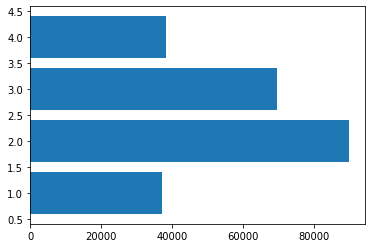

In [15]:
# bar chart 표시
# plt.barh(y=gr_sum['rank'], width=gr_sum['gre'])
plt.barh(gr_sum['rank'], gr_sum['gre'])
plt.show()

### 5.1.2. 여러 열 집계

- 여러 열에 대한 집계를 같이 할 수 있습니다.
- **[ ['gre', 'gpa'] ].sum()** 형태와 같이 집계 대상 열을 리스트로 지정합니다.

In [14]:
# rank별 gre와 gpa 합 조회
gr_sum = graduate.groupby('rank', as_index=False)[['gre', 'gpa']].sum()

# 확인
gr_sum

,rank,gre,gpa
0,1,37320,210.64
1,2,90000,507.61
2,3,69560,415.38
3,4,38200,222.33


- sum() 메소드 앞에 아무 열도 지정하지 않으면 **기준열 이외의 모든 열에 대한 집계**가 수행됩니다.

In [16]:
# rank별 나머지 열들 합 조회
gr_sum = graduate.groupby('rank', as_index=False).sum()

# 확인
gr_sum

,rank,admit,gre,gpa
0,1,33,37320,210.64
1,2,54,90000,507.61
2,3,28,69560,415.38
3,4,12,38200,222.33


- **by=['rank', 'admit']** 과 같이 집계 기준 열을 여럿 설정할 수도 있습니다.

In [17]:
# rank + admit별 나머지 열들 합 조회
gr_sum = graduate.groupby(['rank', 'admit'], as_index=False).sum()

# 확인
gr_sum

,rank,admit,gre,gpa
0,1,0,16320,93.68
1,1,1,21000,116.96
2,2,0,56900,321.71
3,2,1,33100,185.90
4,3,0,52300,316.41
5,3,1,17260,98.97
6,4,0,30960,181.03
7,4,1,7240,41.30


## 5.2. 평균, 최댓값, 최솟값, 개수 구하기

- 위와 동일한 방법으로 평균, 최댓값, 최솟값, 개수를 집계할 수 있습니다.
- sum() 메소드 대신 관련된 메소드만 적절히 지정하면 됩니다. 

**1) 평균 구하기**

In [18]:
# rank별 gre 평균
gr_mean = graduate.groupby('rank', as_index=False)['gre'].mean()  

# 확인
gr_mean

,rank,gre
0,1,611.803279
1,2,596.026490
2,3,574.876033
3,4,570.149254


In [19]:
# rank + admit 별 나머지 모든 열 평균
gr_mean = graduate.groupby(['rank', 'admit'], as_index=False).mean()  

# 확인
gr_mean

,rank,admit,gre,gpa
0,1,0,582.857143,3.345714
1,1,1,636.363636,3.544242
2,2,0,586.597938,3.316598
3,2,1,612.962963,3.442593
4,3,0,562.365591,3.402258
5,3,1,616.428571,3.534643
6,4,0,562.909091,3.291455
7,4,1,603.333333,3.441667


**2) 최댓값, 최솟값, 개수 구하기**


In [20]:
# rank별 gre 최댓값
gr_max = graduate.groupby('rank', as_index=False)['gre'].max()  

# 확인
gr_max

,rank,gre
0,1,800
1,2,800
2,3,800
3,4,800


In [21]:
# rank별 gre 최솟값
gr_min = graduate.groupby('rank', as_index=False)['gre'].min()  

# 확인
gr_min

,rank,gre
0,1,340
1,2,300
2,3,220
3,4,300


In [22]:
# rank별 gre 개수
gr_count = graduate.groupby('rank', as_index=False)['gre'].count()

# 확인
gr_count

,rank,gre
0,1,61
1,2,151
2,3,121
3,4,67


## 5.3. 다양한 형태의 groupby

- **agg()** 메소드를 사용하면 다음과 같은 다양한 형태의 집계도 가능함을 참고하기 바랍니다.

In [24]:
# rank별 gre 개수, 합, 평균
graduate.groupby('rank', as_index=False)['gre'].agg(['count', 'sum', 'mean'])

,count,sum,mean
rank,,,
1,61,37320,611.803279
2,151,90000,596.026490
3,121,69560,574.876033
4,67,38200,570.149254


In [25]:
# rank별 gre, gpa 개수, 합, 평균
graduate.groupby('rank')[['gre', 'gpa']].agg(['count', 'sum', 'mean'])

gre                      gpa                  
     count    sum        mean count     sum      mean
rank                                                 
1       61  37320  611.803279    61  210.64  3.453115
2      151  90000  596.026490   151  507.61  3.361656
3      121  69560  574.876033   121  415.38  3.432893
4       67  38200  570.149254    67  222.33  3.318358

In [27]:
# rank별 gre 평균, gpa 개수
temp = graduate.groupby('rank', as_index=False).agg({'gre':'mean', 'gpa':'count'})
#temp.columns = ['rank', 'gre(mean)', 'gpa(count)']
temp

,rank,gre(mean),gpa(count)
0,1,611.803279,61
1,2,596.026490,151
2,3,574.876033,121
3,4,570.149254,67


<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=300/></center>